In [2]:
!uv pip install -qU pypdf langchain-community langchain-text-splitters

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

pdf_path = "./income_tax.pdf"
loader = PyPDFLoader(pdf_path)
docs = loader.load()
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [4]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2025-10-22T00:31:12+09:00', 'moddate': '2025-10-22T00:31:12+09:00', 'source': './income_tax.pdf', 'total_pages': 130, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n[본조신설 2022. 12. 31.]\n \n제58조(재해손실세액공제) ① 사업자가 해당 과세기간에 천재지변이나 그 밖의 재해(이하 “재해”라 한다)로 대통령령으\n로 정하는 자산총액(이하 이 항에서 “자산총액”이라 한다)의 100분의 20 이상에 해당하는 자산을 상실하여 납세가\n곤란하다고 인정되는 경우에는 다음 각 호의 소득세액(사업소득에 대한 소득세액을 말한다. 이하 이 조에서 같다)에\n그 상실된 가액이 상실 전의 자산총액에서 차지하는 비율(이하 이 조에서 “자산상실비율”이라 한다)을 곱하여 계산\n한 금액(상실된 자산의 가액을 한도로 한다)을 그 세액에서 공제한다. 이 경우 자산의 가액에는 토지의 가액을 포함\n하지 아니한다. <개정 2020. 12. 29.>\n1. 재해 발생일 현재 부과되지 아니한 소득세와 부과된 소득세로서 미납된 소득세액\n2. 재해 발생일이 속하는 과세기간의 소득에 대한 소득세액\n② 제1항의 경우에 제56조, 제56조의2, 제57조 및 제57조의2에 따라 공제할 세액이 있을 때에는 이를 공제한 후의\n세액을 소득세액으로 하여 제1항을 적용한다.<개정 2022. 12. 31.>\n③ 제1항에 따른 공제를 “재해손실세액공제”라 한다.\n④ 

In [5]:
!uv pip install py-zerox

Resolved 52 packages in 870ms                                        
Uninstalled 1 package in 4ms
Installed 1 package in 4ms                                  
 - httpx==0.28.1
 + httpx==0.27.2


In [6]:
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
!uv pip install -q nest-asyncio

In [8]:
import nest_asyncio
nest_asyncio.apply()


In [10]:
from pyzerox import zerox
import asyncio

### Model Setup (Use only Vision Models) Refer: https://docs.litellm.ai/docs/providers ###

## placeholder for additional model kwargs which might be required for some models
kwargs = {}

## system prompt to use for the vision model
custom_system_prompt = None

# to override
# custom_system_prompt = "For the below PDF page, do something..something..." ## example

###################### Example for OpenAI ######################
model = "gpt-4o-mini" ## openai model
# os.environ["OPENAI_API_KEY"] = "" ## your-api-key

# Define main async entrypoint
async def main():
    file_path = "./income_tax.pdf" ## local filepath and file URL supported

    ## process only some pages or all
    select_pages = None ## None for all, but could be int or list(int) page numbers (1 indexed)

    output_dir = "./documents" ## directory to save the consolidated markdown file
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt,select_pages=select_pages, **kwargs)
    return result


# run the main function:
result = asyncio.run(main())

# print markdown result
print(result)

ZeroxOutput(completion_time=374434.648, file_name='income_tax', input_tokens=4794010, output_tokens=131673, pages=[Page(content='# 소득세법\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부 (세제실) 044-215-4312  \n기획재정부 (소득세과) 044-215-4216  \n기획재정부 (음뷸세제과) 044-215-4233  \n기획재정부 (소득세과(사무소), 기타소득) 044-215-4217  \n\n---\n\n## 제1장 총칙\n### 제1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.  \n[본조신설 2009. 12. 31.]  \n[중전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n---\n\n### 제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 둔 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “납세의무자”란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n4. “외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n5. “사업자”란 사업소득이 있는 거주자를 말한다.\n6. 세법에 따른 소득ㆍ가소득자ㆍ비거주자의 구분은 대통령령으로 정한다.  \n[본조신설 2009. 12. 31.]\n\n---\n\n### 제2조의2(납세의무)\n구체적으로 다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.\n1. 거주자\n2. 비거주자\n3. 납세의무자\n4. 외국법인이 국내사업장(出張所)

In [12]:
!uv pip install -q "unstructured[md]" nltk

In [31]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n', '\n']
)

In [14]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [15]:
document_list

[Document(metadata={'source': './documents/income_tax.md'}, page_content='소득세법\n\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부 (세제실) 044-215-4312 기획재정부 (소득세과) 044-215-4216 기획재정부 (음뷸세제과) 044-215-4233 기획재정부 (소득세과(사무소), 기타소득) 044-215-4217\n\n제1장 총칙\n\n제1조(목적)\n\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다. [본조신설 2009. 12. 31.] [중전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n\n“거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 둔 개인을 말한다.\n\n“비거주자”란 거주자가 아닌 개인을 말한다.\n\n“납세의무자”란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n\n“외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n\n“사업자”란 사업소득이 있는 거주자를 말한다.\n\n세법에 따른 소득ㆍ가소득자ㆍ비거주자의 구분은 대통령령으로 정한다. [본조신설 2009. 12. 31.]\n\n제2조의2(납세의무)\n\n구체적으로 다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다. 1. 거주자 2. 비거주자 3. 납세의무자 4. 외국법인이 국내사업장(出張所), 그 밖에 이에 준하는 것을 포함한다. 이하 같다. 5. 그 밖에 이 법에 의해 정하는 원천징수의무자 3. “국세기본법 제3조제1항에 따른 법인 아닌 단체”는 같은 제3조에 따른 법인으로 보는 단체로 한다

In [16]:
!uv pip install -q markdown html2text beautifulsoup4

In [17]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/income_tax.txt'

# 마크다운 파일을 읽어옵니다
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환합니다
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장합니다
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [32]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)
document_list

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='소득세법\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n기획재정부 (세제실) 044-215-4312\n기획재정부 (소득세과) 044-215-4216\n기획재정부 (음뷸세제과) 044-215-4233\n기획재정부 (소득세과(사무소), 기타소득) 044-215-4217  \n\n제1장 총칙\n제1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[중전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27, 2014. 12. 23, 2018. 12. 31.>\n\n“거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 둔 개인을 말한다.\n“비거주자”란 거주자가 아닌 개인을 말한다.\n“납세의무자”란 법인세법 제2조제1호에 따른 내국법인을 말한다.\n“외국법인”이란 법인세법 제2조제3호에 따른 외국법인을 말한다.\n“사업자”란 사업소득이 있는 거주자를 말한다.\n세법에 따른 소득ㆍ가소득자ㆍ비거주자의 구분은 대통령령으로 정한다.\n[본조신설 2009. 12. 31.]\n\n\n제2조의2(납세의무)\n구체적으로 다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.\n1. 거주자\n2. 비거주자\n3. 납세의무자\n4. 외국법인이 국내사업장(出張所), 그 밖에 이에 준하는 것을 포함한다. 이하 같다.\n5. 그 밖에 이 법에 의해 정하는 원천징수의무자\n3. “국세기본법 제3조제1항에 따른 법인 아닌 단체”는 같은 제3조에 따른 법인으로 보는 단체로 한다. 이

In [19]:
!uv pip install -q langchain-chroma

In [20]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")


In [33]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name="income_tax_collection",
    persist_directory="./income_tax_collection"
)

In [34]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

In [29]:
query = "연봉 5천만원 직장인의 소득세는?"

In [35]:
retriever.invoke(query)

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='20년 초과                                           1,200만원 + 120만원 × (납입연수 - 20)\n① 직장공제 초과가입환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 사항은 대통령령으로 정한다. <신설 2014. 12. 23.> <전문개정 2009. 12. 31.> \n제64조(부동산매매임대에 대한 세액 계산의 특례) ① 대통령령으로 정하는 부동산매매임대(이하 “부동산매매임대”라 한다)를 영위하는 거주자(이하 “부동산매매자”라 한다)로서 종합소득금액에 대해 제104조제1항제1호(분양권에 해당한다) 및 제3조 제1호 또는 같은 조 제3항 각 호의 어느 하나에 해당하는 자산의 매매차익(이하 “주택등매차익”이라 한다)이 있는 자의 종합소득산출세액은 다음 각 호의 세액 중 많은 것으로 한다. <개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>'),
 Document(metadata={'source': './documents/income_tax.txt'}, page_content="이자소득에 대해서는 다음의 규정하는 세율\n\xa0 가. 세칙<2017. 12. 19>\n\xa0 나. 비과세대부분의 이익에 대해서는 100분의 25. 다만, '온라인투자연계금융업 및 이용자 보호에 관한 법률'에 따라 금융위험에 등록한 온라인투자연계금융업자는 지급하는 이자소득에 대해서는 100분의 14 한정한다.\n\xa0 다. 제16조제1항에 따른 직장공제회본원금에 대해서는 기본세율\n\xa0 라. 그 밖의 이자소득에 대해서는 100분의 14\n\xa0 마. 배당소득에 대해서는 다음의 규정하는 세율\n\xa0 바. 제17조제1항제3호에 따른 주식공동상장자의 배당소득에 대해서는 100분의 25\n\xa0 사. 그 밖의 배당소득에 대해서는 100분의 12\n\xa0 아. 원천징

In [ ]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    question: str
    answer: str
    context: List[Document]

In [37]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [ ]:
def retrive(state: AgentState) -> AgentState:
    question = state["question"]
    docs = retriever.invoke(question)
    return {"context": docs}

In [40]:
from langchain import hub
from langchain_openai import ChatOpenAI

prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model="gpt-4o")

In [42]:
def generate(state: AgentState) -> AgentState:
    content = state["context"]
    question = state["question"]
    rag_chain = prompt | llm
    answer = rag_chain.invoke({"context": content, "question": question})
    return {"answer": answer}


In [43]:
graph_builder.add_node("retrive", retrive)
graph_builder.add_node("generate", generate)

In [44]:
from langgraph.graph import START, END

graph_builder.add_edge(START, "retrive")
graph_builder.add_edge("retrive", "generate")
graph_builder.add_edge("generate", END)

In [45]:
graph = graph_builder.compile()

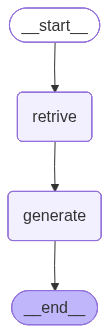

In [46]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
initial_state = {"question": "연봉 5천만원 직장인의 소득세는?"}
result = graph.invoke(initial_state)
print(result)

TypeError: argument 'text': 'list' object cannot be converted to 'PyString'